In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
from datetime import datetime

In [2]:
user_exercise = pd.read_csv("/kaggle/input/final-user-problem-train/grouped_lists.csv")
user_exercise

,user_id_,course_id_,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [3]:
user_exercise = user_exercise.rename(columns={'user_id_': 'user_id', 'course_id_': 'course_id'})
user_exercise

,user_id,course_id,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


# score for user

In [4]:
course_exam = pd.read_csv("/kaggle/input/course-with-exam/final_course_exam.csv")
course_exam = course_exam.drop('Unnamed: 0', axis =1 )
course_exam = course_exam.rename(columns={'id': 'course_id'})
course_exam

,course_id,exam_resources
0,C_1073350,"['Ex_1650729', 'Ex_1650730']"
1,C_1714443,['Ex_3625291']
2,C_1718815,['Ex_4974697']
3,C_1721804,"['Ex_3742687', 'Ex_3742688']"
4,C_1724283,['Ex_3800298']
...,...,...
373,C_948114,"['Ex_1467099', 'Ex_1573116', 'Ex_1573117']"
374,C_948123,['Ex_1467720']
375,C_948128,"['Ex_6318041', 'Ex_6318076']"
376,C_948140,['Ex_1469502']


In [5]:
user_exam = user_exercise[['user_id', 'course_id']].merge(course_exam, on = 'course_id', how = 'left')
user_exam

,user_id,course_id,exam_resources
0,U_10000,C_2033958,['Ex_7007081']
1,U_1000454,C_2199449,NaN
2,U_1000979,C_947149,['Ex_6019082']
3,U_1000979,C_947149,['Ex_6019082']
4,U_1000979,C_947149,['Ex_6019082']
...,...,...,...
2036019,U_99772,C_1903985,NaN
2036020,U_99772,C_1903985,NaN
2036021,U_99772,C_1903985,NaN
2036022,U_99772,C_1903985,NaN


In [6]:
# Bỏ các dòng có NaN ở cột 'exam_resources' - course khong co bai kiem tra cuoi ki
user_exam = user_exam.dropna(subset=['exam_resources'])

# Loại bỏ các dòng trùng lặp (nếu cần, có thể chỉ định subset cụ thể)
user_exam = user_exam.drop_duplicates()

# reset index
user_exam = user_exam.reset_index(drop=True)

user_exam

,user_id,course_id,exam_resources
0,U_10000,C_2033958,['Ex_7007081']
1,U_1000979,C_947149,['Ex_6019082']
2,U_1000982,C_947149,['Ex_6019082']
3,U_1001176,C_947149,['Ex_6019082']
4,U_10074612,C_735342,['Ex_1366726']
...,...,...,...
10200,U_9932630,C_1862240,['Ex_7891977']
10201,U_9933524,C_948103,['Ex_1466575']
10202,U_9940546,C_817691,['Ex_1255836']
10203,U_994080,C_947149,['Ex_6019082']


In [7]:
user_exam[(user_exam['user_id'] == 'U_9932630') & (user_exam['course_id'] == 'C_1862240')]

,user_id,course_id,exam_resources
10200,U_9932630,C_1862240,['Ex_7891977']


In [8]:
nan_count = user_exam['exam_resources'].isna().sum()
print(f"Number of NaN values in exam_resources: {nan_count}")
nan_mean = user_exam['exam_resources'].isna().mean()
print(f"Number of NaN values in exam_resources: {nan_mean}")

Number of NaN values in exam_resources: 0
Number of NaN values in exam_resources: 0.0


In [9]:
# Step 1: Explode exam_resources
exploded = user_exam.dropna(subset=['exam_resources']).copy()
exploded['exam_resources'] = exploded['exam_resources'].apply(eval)  # Convert string to list if needed
exploded = exploded.explode('exam_resources')
exploded = exploded.rename(columns={'exam_resources': 'exercise_id'})
exploded

,user_id,course_id,exercise_id
0,U_10000,C_2033958,Ex_7007081
1,U_1000979,C_947149,Ex_6019082
2,U_1000982,C_947149,Ex_6019082
3,U_1001176,C_947149,Ex_6019082
4,U_10074612,C_735342,Ex_1366726
...,...,...,...
10200,U_9932630,C_1862240,Ex_7891977
10201,U_9933524,C_948103,Ex_1466575
10202,U_9940546,C_817691,Ex_1255836
10203,U_994080,C_947149,Ex_6019082


In [10]:
merged = exploded.merge(user_exercise[['user_id', 'course_id', 'exercise_id', 'percentage_score_completed']], on=['user_id', 'course_id', 'exercise_id'], how='left')

merged

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,user_id,course_id,exercise_id,percentage_score_completed
0,U_10000,C_2033958,Ex_7007081,NaN
1,U_1000979,C_947149,Ex_6019082,NaN
2,U_1000982,C_947149,Ex_6019082,NaN
3,U_1001176,C_947149,Ex_6019082,NaN
4,U_10074612,C_735342,Ex_1366726,NaN
...,...,...,...,...
16687,U_9932630,C_1862240,Ex_7891977,0.74359
16688,U_9933524,C_948103,Ex_1466575,NaN
16689,U_9940546,C_817691,Ex_1255836,NaN
16690,U_994080,C_947149,Ex_6019082,NaN


In [11]:
merged[(merged['user_id'] == 'U_9932630') & (merged['course_id'] == 'C_1862240')]

,user_id,course_id,exercise_id,percentage_score_completed
16687,U_9932630,C_1862240,Ex_7891977,0.74359


In [12]:
# Step 4 (optional): group back if you want one row per user+course
grouped_scores = merged.groupby(['user_id', 'course_id'])['percentage_score_completed'].apply(list).reset_index()

grouped_scores

,user_id,course_id,percentage_score_completed
0,U_10000,C_2033958,[nan]
1,U_1000979,C_947149,[nan]
2,U_1000982,C_947149,[nan]
3,U_1001176,C_947149,[nan]
4,U_10074612,C_735342,[nan]
...,...,...,...
10200,U_9932630,C_1862240,[0.7435897435897436]
10201,U_9933524,C_948103,[nan]
10202,U_9940546,C_817691,[nan]
10203,U_994080,C_947149,[nan]


In [13]:
grouped_scores.head(20)

,user_id,course_id,percentage_score_completed
0,U_10000,C_2033958,[nan]
1,U_1000979,C_947149,[nan]
2,U_1000982,C_947149,[nan]
3,U_1001176,C_947149,[nan]
4,U_10074612,C_735342,[nan]
5,U_10075060,C_735342,[0.2875]
6,U_1008063,C_2033958,[nan]
7,U_10098065,C_854843,"[nan, nan]"
8,U_10099706,C_735342,[nan]
9,U_10182485,C_676642,[nan]


In [14]:
grouped_scores['percentage_score_completed'][10200]

[0.7435897435897436]

In [15]:
# Step 5: Merge back to original DataFrame
user_exam_with_scores = user_exam.merge(grouped_scores, on=['user_id', 'course_id'], how='left')
user_exam_with_scores

,user_id,course_id,exam_resources,percentage_score_completed
0,U_10000,C_2033958,['Ex_7007081'],[nan]
1,U_1000979,C_947149,['Ex_6019082'],[nan]
2,U_1000982,C_947149,['Ex_6019082'],[nan]
3,U_1001176,C_947149,['Ex_6019082'],[nan]
4,U_10074612,C_735342,['Ex_1366726'],[nan]
...,...,...,...,...
10200,U_9932630,C_1862240,['Ex_7891977'],[0.7435897435897436]
10201,U_9933524,C_948103,['Ex_1466575'],[nan]
10202,U_9940546,C_817691,['Ex_1255836'],[nan]
10203,U_994080,C_947149,['Ex_6019082'],[nan]


In [16]:
# Safe parsing of lists (if stored as strings)
user_exam_with_scores['percentage_score_completed'] = user_exam_with_scores['percentage_score_completed'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)
user_exam_with_scores['exam_resources'] = user_exam_with_scores['exam_resources'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Updated function: return NaN if exam_resources is NaN
def calculate_score(row):
    scores = row['percentage_score_completed']
    exams = row['exam_resources']

    # If exam_resources is NaN → return NaN
    if not isinstance(exams, list):
        return np.nan

    # Ensure scores is a list
    if not isinstance(scores, list):
        scores = []

    # Replace NaNs in score list with 0
    scores_clean = [s if pd.notna(s) else 0 for s in scores]
    return sum(scores_clean) / len(exams) if len(exams) > 0 else np.nan

# Apply the function
user_exam_with_scores['final_score'] = user_exam_with_scores.apply(calculate_score, axis=1)


In [17]:
nan_count = user_exam_with_scores['final_score'].isna().sum()
print(f"Number of NaN values in final score: {nan_count}")
nan_mean = user_exam_with_scores['final_score'].isna().mean()
print(f"Number of NaN values in final score: {nan_mean}")

Number of NaN values in final score: 0
Number of NaN values in final score: 0.0


In [18]:
user_exam_with_scores['final_score'].value_counts()

final_score
0.000000    6013
1.000000     652
0.983333     113
0.500000      72
0.469136      65
            ... 
0.427778       1
0.905000       1
0.855000       1
0.575000       1
0.813636       1
Name: count, Length: 745, dtype: int64

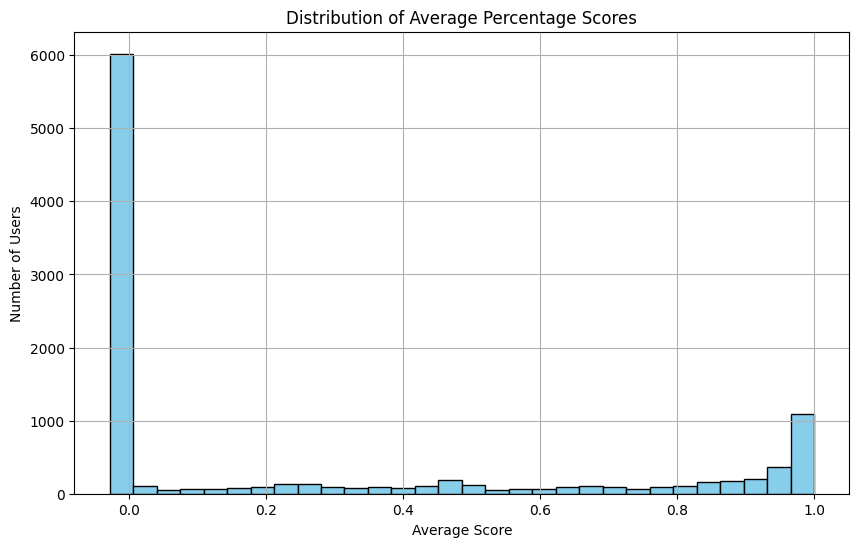

In [19]:
# Drop NaNs to avoid errors
scores = user_exam_with_scores['final_score'].dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Percentage Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


In [20]:
user_exam_with_scores

,user_id,course_id,exam_resources,percentage_score_completed,final_score
0,U_10000,C_2033958,[Ex_7007081],[nan],0.00000
1,U_1000979,C_947149,[Ex_6019082],[nan],0.00000
2,U_1000982,C_947149,[Ex_6019082],[nan],0.00000
3,U_1001176,C_947149,[Ex_6019082],[nan],0.00000
4,U_10074612,C_735342,[Ex_1366726],[nan],0.00000
...,...,...,...,...,...
10200,U_9932630,C_1862240,[Ex_7891977],[0.7435897435897436],0.74359
10201,U_9933524,C_948103,[Ex_1466575],[nan],0.00000
10202,U_9940546,C_817691,[Ex_1255836],[nan],0.00000
10203,U_994080,C_947149,[Ex_6019082],[nan],0.00000


In [21]:
user_exam_with_scores.to_csv('user_score.csv', index = False)

# exercise not final exercise

In [22]:
user_exercise

,user_id,course_id,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [23]:
course_exam

,course_id,exam_resources
0,C_1073350,"['Ex_1650729', 'Ex_1650730']"
1,C_1714443,['Ex_3625291']
2,C_1718815,['Ex_4974697']
3,C_1721804,"['Ex_3742687', 'Ex_3742688']"
4,C_1724283,['Ex_3800298']
...,...,...
373,C_948114,"['Ex_1467099', 'Ex_1573116', 'Ex_1573117']"
374,C_948123,['Ex_1467720']
375,C_948128,"['Ex_6318041', 'Ex_6318076']"
376,C_948140,['Ex_1469502']


In [24]:
course_exam['exam_resources'] = course_exam['exam_resources'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
course_exam_exploded = course_exam.explode('exam_resources')
course_exam_exploded

,course_id,exam_resources
0,C_1073350,Ex_1650729
0,C_1073350,Ex_1650730
1,C_1714443,Ex_3625291
2,C_1718815,Ex_4974697
3,C_1721804,Ex_3742687
...,...,...
376,C_948140,Ex_1469502
377,C_948148,Ex_1470485
377,C_948148,Ex_5941667
377,C_948148,Ex_1470486


In [25]:
# 2. Loại bỏ các dòng trong user_exercise mà exercise_id thuộc danh sách trên
filtered_user_exercise = user_exercise[~user_exercise['exercise_id'].isin(course_exam_exploded['exam_resources'])].reset_index(drop=True)
filtered_user_exercise

,user_id,course_id,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,10.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029266,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2029267,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2029268,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2029269,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [26]:
filtered_user_exercise.to_csv("exercise_without_final_exam.csv", index = False)